# Practice AI-1: 基本的なグラフ探索処理

**目次**
- [](Tutorial_1-python-basic.ipynb)
- [](Tutorial_2-data-structure.ipynb)
- [](#Step-A1)
- [](#Step-A2)
- [](#Step-A3)
- [](#Step-A4)

**人工知能実験の目標** &mdash; _The aim of AI experiment_

迷路探索問題は，古典的な人工知能における典型的な問題の一つである．  
迷路探索に必要な探索処理は，適切な前提を置くことができれば，グラフ探索問題として解ける．

本実験では，迷路探索問題を解くためのプログラムを作成する．  
プログラムの実装を通して，**探索アルゴリズムの特徴を理解する**と同時に，**データ構造とアルゴリズムに対する理解を深める**ことを目指す．

**AI-1 の概要** &mdash; _Abstract (AI-1)_

第1回は，深さ優先探索と幅優先探索を実装し，探索アルゴリズム実装の基本形を理解する．  
そのうえで，簡単な実験を通して，各探索アルゴリズムの特徴（長所と欠点｜Pros.&Cons.）に関する理解を深める．

アルゴリズムの実装は，データ構造とアルゴリズムに対する理解を応用すれば，容易に実装可能である．

:::{hint}
受講生によって進捗が様々だと思いますので，今回の課題は少し多めに提示しています．

少なくとも日報段階では [解説A3] に相当する内容まで終わらせることを最優先としてください．  
Done is better than perfect! です．

そのうえで，宿題として[解説A4]まで終わらせ，できる限りの理解を深めておくことを，強くお勧めします．  
人工知能実験は2回しかありませんので，遅れをリカバリする余裕は，それほどありません．
:::

## AI-1の課題

別紙 `Report_AI-1_{student_id}.ipynb` を用いて，以下の考察課題に対するレポートを作成してください．  
レポートの作成にあたっては，本紙の解説や練習問題等を参考にしながら，必要なプログラムの作成と考察をおこなってください．

:::{important} 課題 AI-1
迷路探索のためのグラフ探索として，「深さ優先探索」と「幅優先探索」をおこなうプログラムを作成し，その実装や実装方針について考察せよ．  
このとき，実例として，①探索対象のグラフ，②探索過程や探索結果等，を明示したうえで，実装上の各処理に関する考察を述べること．
:::

:::{dropdown} 考察課題（★発展★）　※任意課題
★発展 Level 1★  
基本課題の考察において，『経路を見つけるという目的においては終了判定（処理(6)）は不要である』という
命題([_cf. wikipedia_](https://ja.wikipedia.org/wiki/%E5%91%BD%E9%A1%8C))に基づいて，より深い考察を示してみよう．

```{dropdown} 発展 Level 1についての注意．
レポートで『ここで「・・・」という命題が与えられたので考えてみる』のような書き方はしないように．

命題についての何らかの解が含まれるように，レポートの中で自ら導き出すように書いてください．  
もう少し言い換えると，何らかの実験結果として，

- ・・・このことから，経路を見つけるという目的においては終了判定（処理(6)）は不要である．ただし，・・・
- ・・・このため，終了判定（処理(6)）をすることで，経路を見つけることができるのである．・・・

のような一文が書かれていることを期待しています．（文面はこれらに限る必要は全くありません．）
```
:::


## 準備

次の3つのセルで，以降の処理に必要なライブラリを読み込みます．  
必ず実行してから，以降の解説資料やその練習問題に取り組んでください．

ヒント：左に目次を出しているなら，「準備」見出しを右クリックして「Select and Run cell(s) for this heading」でも実行できます．

In [2]:
# 本実験でほぼ毎回利用するライブラリ
import sys
import numpy as np

from IPython.display import display, Markdown

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["savefig.bbox"] = 'tight'

# データ構造の定義に利用する
from collections import deque
from dataclasses import dataclass

# グラフ構造の描画に利用するライブラリ
#   - ebai.py の中で利用しており，明示的に利用する必要は，ほぼない．
import networkx as netx

#
# DEBUG
#   ツールのバージョン依存の問題が起こることもあります．(Pythonでは特に顕著)
#   重要なツールについては「動作確認の環境」として，ツール名だけでなくバージョン名も書く習慣をつけましょう．
#
print('*** System Information ***')
print(f'Python     : {sys.version}')
print(f'NumPy      : {np.__version__}')
print(f'Matplotlib : {matplotlib.__version__}')
print(f'NetworkX   : {netx.__version__}')

*** System Information ***
Python     : 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
NumPy      : 2.3.2
Matplotlib : 3.10.5
NetworkX   : 3.5


In [3]:
%reload_ext autoreload
%autoreload 1
%aimport ebai
    # 上記の3行は，Jupyter Lab の特殊なコマンドです．
    # - 本講義の範囲を超えるので，詳細を理解する必要はありません．
    # - 通常は，一度 import すると，再度同じファイルを import することはできません，
    #   - 正確には，実行しても，まったく効果がありません．
    #   - importを実行してから，ebai.py を編集しても，再度 import する術がありません．
    # - そこで，上記3行を書くことで，ebai.py に定義された関数は，毎回 ebai.py を
    #   再読み込みしてから実行してくださいね，という動作に切り替えることができます．
    #   （関数呼び出しのオーバーヘッドが増えるというデメリットはあります．なので，
    #     開発用途の特殊コマンド，という位置づけで，理解しておきましょう．）
    # 参考：https://ipython.org/ipython-doc/stable/config/extensions/autoreload.html

# 人工知能実験用の補助関数を定義したサブライブラリ（改変不可）
import ebai
    # 以降，ebai.pyの中に書かれた関数は，"ebai." のように名前空間を明示することで利用できます．
    # 例えば，以下の記述は，ebai.py の中に書かれた，ebai_info()という関数を呼び出しています．

ebai.ebai_info()
display(Markdown("**要確認：Revision 2025.1 以上が必要です**"))

/home/users/ecs/09B23523/exp-b/ai/ebai.py
> Revision 2025.1
> 更新日時：2025-10-03 11:18:05.715802
>
> Python     : 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
> NumPy      : 2.3.2
> Matplotlib : 3.10.5
> NetworkX   : 3.5


**要確認：Revision 2025.1 以上が必要です**

In [4]:
# PNGかPDFで画像を出力する
# - 難解なのでこのセルの詳細は理解しなくても問題ありません．
# - 以降，画像を描画する場所でエラーが出る場合は，以下を無効化して，
#   Kernel->Restart Kernelしてください．
# - レポートPDFを作るときに，どうしても画像サイズが10 MB超える！という場合は，
#   ('png', 'pdf') を ('jpeg') のみに置き換えてから，試してみてください．
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

(Step-A1)=

## [解説A1] データ構造とアルゴリズム (2) -- Stack, Queue, Graph

人工知能実験では，以下のデータ構造を活用していきます．必要に応じて，データ構造とアルゴリズムの教科書を参照して，復習してください．

- Stack
- Queue
- Graph

**途中のソースコードセルにテストコードを書き加えるなどして，少しずつ理解を深めることをお勧めします．**

Exercise については，レポートへの記載はほぼ不要ですが，実施しておくべき練習問題です．  
TAや教員は，別紙 Tutorial や Exercise を解いていることを前提に質問を受け付けます．

(stack_and_queue)=

### (1) Stack and Queue

StackもQueueも，より高度なリストの一種である，と捉えておけば，今のところ問題はないでしょう．（参照：スライド#22-23）

本講義では，以下のポリシーで運用します．

  - Stack も Queue も，`collections.deque` オブジェクトを利用する．（deque は「デック」と発音する．）
    - https://docs.python.org/ja/3.12/library/collections.html#collections.deque
    - 同じデータ構造オブジェクトにデータを格納するが，関数の使い分けにより，適切な意味を持たせることができる．
  - Stack
    - _PUSH_ => `append()` method
    - _POP_  => `pop()` method
  - Queue
    - _ENQUEUE_ => `append()` method
    - _DEQUEUE_ => `popleft()` method


In [5]:
from collections import deque
    # ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
    # 　本欄のように，字下げして書かれたコメントの一切について，提出レポートに
    #   含めることを許可しません．（日報段階での混入は，許容します．）
    #   なお，"""と"""で囲われた DOCSTRING は，そのまま残して構いませんが，各自の
    #   実際の処理と矛盾がないようにしてください．講義としての注意書きも不要．
    #   レポートとして必要な内容，あるいは，自分自身の覚書として必要ならば，
    #   「自分の言葉」で説明するようにしてください．
    # ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
    #
    # - 冒頭でもimportしているが，解説のため，ここにも書いている．
    #   - 通常，import は一回だけすればよい．
    # - from A import B という書き方をせず，import collections と書いた場合，
    #   以降の deque 初期化において，
    #       collections.deque([1, 2, ...
    #   のように書く必要が出てくる．シンボル名の重複がないなら，この書き方で十分．

#### 基本

In [6]:
##
## Stack
##

# STACK.initialize
data_stack = deque([1, 2, 3, 4])
print(data_stack)

# STACK.push
data_stack.append(10)
print(data_stack)
    # 複数要素を入れたいなら，extendを使うこともできる．
    # ただし，今回の作成では使わなくても実装できるはず．

# STACK.pop
## 1st time
a = data_stack.pop()
print(a)
print(data_stack)

## 2nd time
a = data_stack.pop()
print(a)
print(data_stack)

deque([1, 2, 3, 4])
deque([1, 2, 3, 4, 10])
10
deque([1, 2, 3, 4])
4
deque([1, 2, 3])


In [7]:
##
## Queue
##

# QUEUE.initialize
data_queue = deque([1, 2, 3, 4])
print(data_queue)

# QUEUE.enqueue
data_queue.append(10)
print(data_queue)

# QUEUE.dequeue
## 1st time
a = data_queue.popleft()
print(a)
print(data_queue)
    # queueとして要素を取り出す場合，先頭から取り出します．
    # 末尾 (printの表示では，"右"側) にデータが enqueue されていますので，
    # 先頭から取り出す = dequeue なら，左から pop --> popleft() となります．

## 2nd time
a = data_queue.popleft()
print(a)
print(data_queue)

deque([1, 2, 3, 4])
deque([1, 2, 3, 4, 10])
1
deque([2, 3, 4, 10])
2
deque([3, 4, 10])


#### 迷路探索における状態を Stack/Queue に格納

Stack や Queue には，1つの数字だけでなく，タプル・辞書型・データクラスなどを利用すれば，複数の項目を持つ1要素を格納することもできます，

本実験では，迷路探索のためのグラフ探索をします．
迷路探索過程における **状態** を表現するため， `State` というデータクラスを用意しましょう．

In [8]:
@dataclass
class State:
    """
    Parameters
    ----------
    id: int
        ロボットが現在居る場所．探索したいグラフのノード番号で指定する．
        Adjacency Matrix/List の番号と相互参照できるものとする．

    cost: float
        探索過程におけるノードのコスト g(n)

    parent_id: int
        現在位置に至る1つ前の時点で滞在していた場所．ノード番号で指定する．
        値が負のとき，親ノードは存在しないこととする．

    Note
    ----
    - AI-1の時点では，コストは使わない．次回の「知識のある探索」で利用する．
      - ただし，発展として使っていても差し支えはない．
    - AI-1の時点では，比較関数を実装していないためソートできない
      (AI-2/Tutorial_3 で解決する)
    """
    
    id: int
    cost: float
    parent_id: int


In [9]:
# Debug
# 簡単に利用例を見ておきましょう．
_s1 = State(0, 1.0, -1)
_s2 = State(id=1, parent_id=0, cost=2.0)
    # 仮引数名を明示して代入することもできる．
    # 引数名を明示すれば，仮引数と順番を入れ替えて書いても問題はない．

print(f'---- {_s1=}')
print(_s1.id, _s1.cost, _s1.parent_id)

print(f'---- {_s2=}')
print(_s2.id, _s2.cost, _s2.parent_id)


---- _s1=State(id=0, cost=1.0, parent_id=-1)
0 1.0 -1
---- _s2=State(id=1, cost=2.0, parent_id=0)
1 2.0 0


では，このデータを Stack に格納する例を見てみましょう．

現段階では，リスト型＋辞書型（や，タプル型）と，ほぼ同じ感覚で利用できるはずです．  
（稀に，`list` にあるメソッドが `deque` にはない，またはその逆，がありえますので注意してください．）

In [10]:
#
# States in Stack
#
# Initialize
state_stack = deque([])
display(state_stack)
print('-----')

# Push
state_stack.append(State(0, cost=10, parent_id=-1))
state_stack.append(State(1, cost=8, parent_id=-1))
state_stack.append(State(2, cost=99, parent_id=-1))
display(state_stack)  # 数が多い場合は display のほうが目で見て見やすくなる場合が多い
print('-----')

# Pop
## 1st time
_state = state_stack.pop()
print('POP:', _state)
display(state_stack)
print('-----')

## 2nd time
_state = state_stack.pop()
print('POP:', _state)
display(state_stack)
print('-----')

deque([])

-----


deque([State(id=0, cost=10, parent_id=-1),
       State(id=1, cost=8, parent_id=-1),
       State(id=2, cost=99, parent_id=-1)])

-----
POP: State(id=2, cost=99, parent_id=-1)


deque([State(id=0, cost=10, parent_id=-1), State(id=1, cost=8, parent_id=-1)])

-----
POP: State(id=1, cost=8, parent_id=-1)


deque([State(id=0, cost=10, parent_id=-1)])

-----


```{exercise}
上記の stack としての操作の例を参考にして，queue としての動作例を作成してください．

ヒント：必要な処理は，本節ですべて説明済みである．ググったりAIに聞く必要は全くない．
```

In [11]:
#
# States in Queue
#
# Initialize
state_queue = deque([])
print(state_queue)
print('-----')

# Enqueue
state_queue.append(State(0, cost=10, parent_id=-1))
state_queue.append(State(1, cost=8, parent_id=-1))
state_queue.append(State(2, cost=99, parent_id=-1))
display(state_queue)  # 数が多い場合は display のほうが目で見て見やすくなる場合が多い
print('-----')

# Dequeue
_state = state_queue.popleft()
print('Dequeue:', _state)
display(state_queue)
print('-----')
# Dequeue
_state = state_queue.popleft()
print('Dequeue:', _state)
display(state_queue)
print('-----')

deque([])
-----


deque([State(id=0, cost=10, parent_id=-1),
       State(id=1, cost=8, parent_id=-1),
       State(id=2, cost=99, parent_id=-1)])

-----
Dequeue: State(id=0, cost=10, parent_id=-1)


deque([State(id=1, cost=8, parent_id=-1), State(id=2, cost=99, parent_id=-1)])

-----
Dequeue: State(id=1, cost=8, parent_id=-1)


deque([State(id=2, cost=99, parent_id=-1)])

-----


### (2) Graph

#### 迷路探索のためのグラフ構造の定義

本講義では 以下の変数群をもって，迷路探索のためのグラフ構造を定義します．（参照：スライド#10および#24～25）  
「迷路探索のためのグラフ構造」として必須の変数と，便宜上必要な変数が混在しています．注意して読み進めてください．

ここでは，[Tutorial 2](Tutorial_2-data-structure.ipynb) で検討した中でも [c) Adjacency List 表現](Tutorial_2-data-structure.ipynb#tut2-adjacency_list_repr)（`graph?_edgedict`) を利用することにします．

In [12]:
## Graph1: (Weighted) Adjacency List (Edge dict)
#  - Note: Node no.0 is alwarys assumed as Source Node (= start of the maze) in this lecture.
#          You can select "entry point of the maze" by destination of Node no.0
graph1_edgedict = {
    0: [(1, 1.0)],
    1: [(2, 1.0), (3, 1.0)],
    2: [(1, 1.0)],
    3: [(1, 1.0), (4, 1.0), (5, 1.0)],
    4: [(3, 1.0)],
    5: [(3, 1.0)]
}

#
# DEBUG
#
print(f'DEBUG: graph1_edgedict =')
display(graph1_edgedict)
    # 複雑な構造の場合，display関数で表示したほうが見栄えが良い場合が多いです


DEBUG: graph1_edgedict =


{0: [(1, 1.0)],
 1: [(2, 1.0), (3, 1.0)],
 2: [(1, 1.0)],
 3: [(1, 1.0), (4, 1.0), (5, 1.0)],
 4: [(3, 1.0)],
 5: [(3, 1.0)]}

In [13]:
## Graph1: Target nodes: Node ID(s) of Target nodes (=goals)
#graph1_source = 0
graph1_target  = 5
    # - Source node (スタート地点)から探索を開始し，Target node(ゴール地点)にたどり着くことが目的です．
    #   - 定めた数字は，graph1_edgedict で定義したノード(Key)と対応させます．
    # - Source nodeは，簡単のため，常に 0 番ノードとします．
    #   - さらなる簡単のため，上記でコメント化している通り，graph1_source は，そもそも定義しないことにします．
    # - Target node (ゴール) も，簡単のため，1つにしておきましょう．

#
# DEBUG
#
print(f'DEBUG: {graph1_target=}')

DEBUG: graph1_target=5


In [14]:
## Graph1: Positions of nodes (for visualization)
graph1_pos = {
    0: [0, 2],
    1: [1, 1],
    2: [1, 0],
    3: [2, 1],
    4: [2, 0],
    5: [3, 1]
}
    # - 後の描画で，ノードを描画平面のどの座標に置くか？を指定するための，辞書(dict)型変数です．
    #   - "{ key1: [x1, y1], key2: [x2, y2]" の形で，key?はAdjacency Matrix のインデックス，
    #   - x1, y1は描画平面の x, y座標．　【注意】(x,y)=(0,0) が左上となる「左上原点」です．
    #   - 上記例なら，0番ノードは座標(0, 0)へ描画，1番ノードは座標(1, 1)へ描画，，，のような意味．
    #   - 次セルのグラフ描画の結果を見ながら，照らし合わせつつ確認してみてください．
    # - なお，graph?_pos変数は，描画に必要なのであり，グラフ構造として必須の要素ではありません．

#
# DEBUG
#
print(f'DEBUG: {graph1_pos=}')

DEBUG: graph1_pos={0: [0, 2], 1: [1, 1], 2: [1, 0], 3: [2, 1], 4: [2, 0], 5: [3, 1]}


:::{exercise}
ここまでの説明は理解できたでしょうか？
[Tutorial 2 -- Pythonの基本(2)](Tutorial_2-data-structure.ipynb#tut-python-basic2) の復習も兼ねて，念のため確認しておきましょう．

次のような表示を実現してください．ここまでに出てきている変数を利用して `???` 部分を表示する必要があります．

```
ノード 1 からノード 3 へのエッジの重みは 1.0 である．  
ノード 3 からノード 1, 4, 5 に移動することができる．  
ノード 4 は，座標 (2, 0) に描画することが期待されている．
```
※注：2行目の出力において， `1, 4, 5` は `1, 4, 5, ` となっていても良い．  
※注：2行目の出力において，起点を変えたプログラムを書く必要はない（`ノード 3 から` 以外を考えなくてよい）
:::

In [15]:
###### WRITE YOUR ANSWER
print(f'ノード 1 からノード 3 へのエッジの重みは {graph1_edgedict[1][1][1]} である．')
print(f'ノード 3 からノード ', end=' ')
for i in range(len(graph1_edgedict[3])):
    print(graph1_edgedict[3][i][0], end=', ')
print(f'に移動することができる．')
print(f'ノード 4 は，座標 ( {graph1_pos[4][0]} , {graph1_pos[4][1]} ) に描画することが期待されている．')

ノード 1 からノード 3 へのエッジの重みは 1.0 である．
ノード 3 からノード  1, 4, 5, に移動することができる．
ノード 4 は，座標 ( 2 , 0 ) に描画することが期待されている．


#### グラフの描画

本講義では，`ebai.draw_graph_structure()` 関数を使って描画すればよい．  
関数の説明は，セルの実行後，関数名の上に入力カーソルを当てて， Shift + Tab で表示される（はず）．

コメントアウトしている行のように，[`savefig()`](https://matplotlib.org/3.8.4/api/_as_gen/matplotlib.pyplot.savefig.html) を利用することで，
画像ファイルとして保存することができる．  

:::{warning}
- 講義時間の都合上，ebaiモジュールに含まれる関数の中身の詳細は，無理に理解しなくてよい．（レポートも不要）
- 以下のコメントアウト部は，`output/` というディレクトリに画像ファイルを出力しようとしている．必要に応じて各自のディレクトリを準備することを忘れずに．
:::


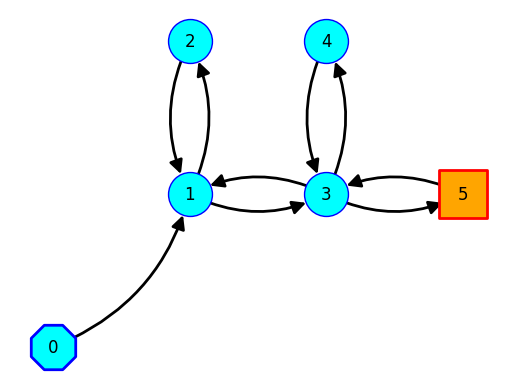

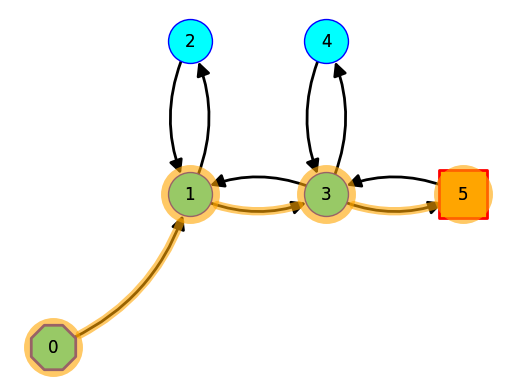

In [16]:
# -----------------------------------------------------------------
# Example 1: Draw the Graph
fig1, ax1 = plt.subplots()
ebai.draw_graph_structure(graph1_edgedict, graph1_pos, graph1_target,
                          ax=ax1)
# fig1.savefig('output/AI-1_graph1_example1.png', format='png')
# fig1.savefig('output/AI-1_graph1_example1.pdf', format='pdf')

# -----------------------------------------------------------------
# Example 2: Draw the Graph w/ hightlight path
fig2, ax2 = plt.subplots()
ebai.draw_graph_structure(graph1_edgedict, graph1_pos, graph1_target,
                          highlight_path=[0, 1, 3, 5],
                          ax=ax2)
# fig2.savefig('output/AI-1_graph1_example2.png', format='png')
# fig2.savefig('output/AI-1_graph1_example2.pdf', format='pdf')


### «PRACTICES»

:::{important} PRACTICE &star;　※考察不要
レポート（すなわち，別紙）でも，Graph1 の定義を行い，図示してください．（経路のハイライトは不要）
:::

:::{important} PRACTICE &star;　※考察不要
下図のようなGraph2 (`graph2_edgedict`, `graph2_target`, `graph2_pos`) を定義し，描画し，レポートに掲載してください．  
(`graph2_pos`は，描画後の位置関係がおおむね正しければ十分．細かいズレは気にしなくてもよい．)

![](example/Example-AI-graph2.png)

※注：↑に図が表示されていない人は，`~/jikkenB/example`ディレクトリ以下に `Example-AI-graph2.png` を置いてください．
:::


DEBUG: graph2_edgedict=


{0: [(1, 1.0), (2, 1.0)],
 1: [(2, 1.0), (3, 1.0)],
 2: [(1, 1.0), (4, 1.0)],
 3: [(1, 1.0), (4, 1.0), (5, 1.0)],
 4: [(2, 1.0), (3, 1.0), (6, 1.0)],
 5: [(3, 1.0)],
 6: [(4, 1.0)]}

DEBUG: graph2_target=5
DEBUG: graph2_pos={0: [0, 1], 1: [1, 2], 2: [1, 0], 3: [2, 1], 4: [2, 0], 5: [3, 1], 6: [3, 0]}


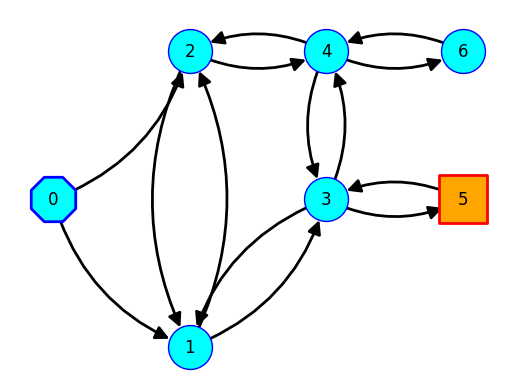

In [17]:
## Graph2 Definition
# Adjacency List (Edge dict)
graph2_edgedict = {
    0: [(1, 1.0), (2, 1.0)],
    1: [(2, 1.0), (3, 1.0)],
    2: [(1, 1.0), (4, 1.0)],
    3: [(1, 1.0), (4, 1.0), (5, 1.0)],
    4: [(2, 1.0), (3, 1.0), (6, 1.0)],
    5: [(3, 1.0)],
    6: [(4, 1.0)]
}

# Target node(s)
graph2_target = 5

# Positions of nodes
graph2_pos = {0: [0, 1], 1: [1, 2], 2: [1, 0], 3: [2, 1], 4:[2, 0], 5:[3, 1], 6: [3, 0]}

# Draw the Graph
fig2, ax2 = plt.subplots()
ebai.draw_graph_structure(graph2_edgedict, graph2_pos, graph2_target,
                          ax=ax2)

#
# DEBUG
#
print(f'DEBUG: graph2_edgedict=')
display(graph2_edgedict)
print(f'DEBUG: {graph2_target=}')
print(f'DEBUG: {graph2_pos=}')

(Step-A2)=

## [解説A2] グラフ探索アルゴリズム

以下の例では，基本となる探索アルゴリズムを **Stack** データ構造により，実装しています．


基本的な流れはスライド資料#13～16で説明している通りです．（注：参考書「アルゴリズム論」とは，リストの扱い方が異なります．）

### 探索対象のグラフ

In [18]:
# Parameters
graph_edgedict = graph1_edgedict
graph_target = graph1_target
graph_pos = graph1_pos
    # - 変数代入と探索処理は別のセルに書いておくと，後で様々なグラフ構造の実験をする際に便利です．
    # - 変数定義をして，任意のセルを実行するという作業は，グローバル変数だけを扱う関数を呼び出す
    #   行為とほぼ等価であることに気づいてください．

### (1, 2) 探索の初期化処理（とループの開始）

In [19]:
# ---------------------------------------------------------------------------
# (1) Initialization
# (1-1) Prepare open_list as STACK, QUEUE, or XXXX(AI-2)
open_list = deque([State(0, cost=0, parent_id=-1)])
    # - open_list は "List(deque) of State" とする．
    #   - [] の中に State() を1つだけ入れており，そのリストで deque を初期化している．
    # - スタートは常に0番ノードにする．
    #   - いったんはcost = 0, parent_id = -1 ということにしておく．
    #   - 【重要】cost と parent_id は後で見直しが必要．

# (1-2) Prepare closed_list as DICT
closed_list = dict()
    # - closed_list は "Dict of State" とする．
    # - cf. This implementaion by dict might be easy and simple one.
    #       However, an implementation by list (static table) might
    #       be faster. As some algorithm contest, the dict implementation
    #       will be caused TLE (Time Limit Exceed)...

# DEBUG
print(f'(1) {open_list=}')
print(f'(1) {closed_list=}')


# ---------------------------------------------------------------------------
# (2) Loop until the open_list is empty
#     (Loop while(if) the open_list is not empty)
loop_count = 0
while len(open_list) > 0 and loop_count < 100:
    # - open_listに要素がある限り，ループし続ける
    # - 安全のため，loop_count が増えすぎてるなら，タイムアウトとして止める．
    #   **初期の100では，探索対象のグラフによっては少なすぎるかもしれないので，注意．**
    # - なお，例年 while 文が苦手という人がいるようですが・・・
    #   while文は，if文とほぼ同じです．条件が成立するなら内部を実行する，です．
    #   ただし，if文は内部を実行終えたら，そこで終わるが，while文は条件判定に戻る．
    #   cf. アセンブラで言えば，if でも while でも，beqによる条件分岐があるのは同じだが，
    #       while は最後に j whie_loop を置くことでループ構造を実現する．
    #       https://www.swlab.cs.okayama-u.ac.jp/~nom/lect/p3/dat/examples/ans-practice5-1.s 

    break
        # 次セルで示したwhileループ内の処理が正しく実装できれば，この break は不要です．
        # - 以降のセルの挙動を確かめて，一つのセルに実装する際は，この break は消して下さい．
        # 無限ループについて
        # - 無限ループに陥った場合は，Tab内の ■ ボタンで止めてください．
        #   （セル横の実行が終われば数字が出るはずの個所が，いつまでも＊記号のままの場合）
        # - 試してみたい人は，breakをpassかcontinueに変えてみましょう．無限ループになります．


(1) open_list=deque([State(id=0, cost=0, parent_id=-1)])
(1) closed_list={}


### (3, 4, ..., 7) 探索処理

※本セルを実行する前に，セル内で右クリック「Create New View for Output Cell」を実行し，
その後，下に追加されるであろうタブ（パネル）を右側に持っていくと，見やすいです．


----- LOOP = 1
(3) cur_state=State(id=0, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=1, cost=0, parent_id=-1)])


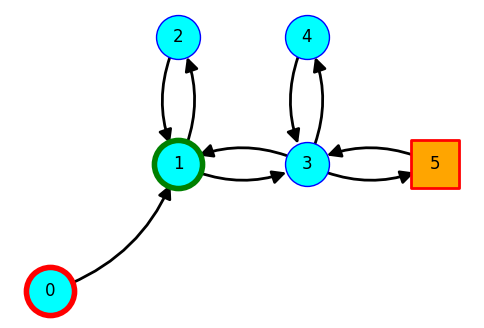

In [20]:
for _ in [1]:
    # - ↑のfor文は，whileループと結合する際には，不要． 
    #   - 後で上記セル内のwhile文とくっつけるときにインデントを保つために入れている．
    # - 結合前のお試しの際は・・・
    #   - 上のセルを実行することで，探索前の初期状態に戻る．
    #   - このセルを実行するたびに，ループ１回分の処理がなされる
    #   ということを利用して，動作の理解をしてほしい．

    loop_count += 1;
    print(f'\n----- LOOP = {loop_count}')

    # -----------------------------------------------------------------------
    # (3) Set current state for search algorithm
    cur_state = open_list.pop()   # POP as STACK

    #     DEBUG
    print(f'(3) {cur_state=}')
    print(f'(3) {open_list=}')

    # -----------------------------------------------------------------------
    # (4) Update closed_list
    assert cur_state.id not in closed_list, f'REVISITED: {cur_state.id=} should not in {closed_list=}'
        # - assert は条件を満たしていないときに処理を止める関数です
        #   - アルゴリズムとして必要なのではなく，検証 (validation) の一種です．
        # - 後述の (7-1) や (7-2) で適切な処理をしていない場合は，
        #   ここで "再訪(revisit)" してしまう場合があります．
        #   - "再訪" になってしまう場合は，ここで処理を加えるよりは (7) を見直しましょう．
        # - ただし・・・どうしても解決できない（か，独自に考えているアルゴリズムであり，
        #   ここでの再訪相当を適切に処理することにした）なら，この assert を除いてください．
        #   - それはそれで，考察できることは増えると思いますので．．．

    closed_list[cur_state.id] = cur_state
        # - closed_list に記録を残します．
        # - 本講義で想定しているアルゴリズムであれば，ここでは上書きは起こりません．
        #   - 上述の通り，アルゴリズムによっては，何らかの条件分岐が必要かもしれません．

    #     DEBUG
    print(f'(4) {closed_list=}')

    # -----------------------------------------------------------------------
    # (5) Check whether reaching the target (goal) or not
    if graph_target in closed_list:
        # Python の独特な条件式です．graph_target と一致する要素が，
        # closed_list のキーに含まれているかどうかのチェックをしています．

        print('\n**** I have reached the target node!!\n')
        break
            # この終了条件は，今後必要に応じて見直しが必要になるでしょう．
            # 【発展】ここで終了しなくても，解説A3の経路探索は実現できる．
            #         （終了すべきでない，とまでは言っていません．考察課題です．）

    # -----------------------------------------------------------------------
    # (6) Find adjacent nodes
    candidate_state_nodes = graph_edgedict[cur_state.id]
        # - cur_stateのノードの隣接ノードは，graph_edgedict を辞書引きすればよい
        # - この時点では candidate_state_nodes は (dst_id, weight) のタプルである．

    #     DEBUG
    print(f'(6) {candidate_state_nodes=}')

    # -----------------------------------------------------------------------
    # (7) Update open_list
    for _dst_id, _weight in candidate_state_nodes:
        candidate_state = State(
            id=_dst_id,
            cost=0,       # TODO: 解説A5 & A6 (AI-2)
            parent_id=-1  # TODO: 解説A3
        )
            # - for ループを使い，候補となるノードを追加したい．効率は無視．
            #   - 候補となるノードは，[解説A2]時点では，id (ノードID)しか情報を持っていない．
            #   - parent_id は，次の[解説A3]で考え直す必要がある．
            #   - cost は，AI-2で考え直す必要がある．
            # - 以降，_candidate_node を open_list に追加してよいかどうか，
            #   を判定してから，最終的に，open_list へ追加する．

        # (7-1) Ignore the candidate, if it existing in closed _list
        #   Note: We should reconsider this process, if try to implement A* algorithm
        if candidate_state.id in closed_list:
            continue
                # - closed_list は dict 型なので in 演算子で存在の判定ができる
                # - _dst_id が探索済みのノード（closed_list内のノード）である
                #    ==> open_listには追加しない．
                #    ==> "continue" により，以降の処理は実行せず，forループを継続する

        # (7-2) Ignore the candidate, if it existing in open_list
        #   Note: We must reconsider this process at AI-2
        _exist_state = [x for x in open_list if x.id == candidate_state.id]
        _exist_state = _exist_state[0] if _exist_state else None
        if _exist_state is None:
                # - 本講義だけでは，この3行の条件判定の解説は難しいので，深入りしないで構いません．
                # - この処理では，open_list 内の全探索状態に candidate_state.id と同じIDがあれば，
                #   _exist_state として，open_list の1要素が得られます．無ければ None です．

            open_list.append(candidate_state)
                # - _dst_id は探索待ちのノード（open_list内のノード）ではない
                #    ==> open_list に追加する

        else:
            pass
                # - open_list に _dst_id と同じ id の状態データが存在する
                #    ==> (AI-1では) open_listには追加しない．
                #
                # 【重要】AI-2で cost も踏まえた再検討をする．次回のTutorial 3 も注意深く確認しよう．

    print(f'(7) {open_list=}')

# -----------------------------------------------------------------------
# DEBUG: draw the Graph
ebai.draw_graph_structure(graph_edgedict, graph_pos, graph_target,
                          open_list=open_list, closed_list=closed_list)
    # - 先ほどの描画例に加えて，open_list, closed_list も追加している
    #   - 適宜，引数を与えずに描画するなどして，描かれた図の各シンボルが
    #     何を表しているのか，理解をしてください．
    # - ループ込みの完成版であれば，ループ内で毎回描画するのは，無駄である．
    #   必要な場所でのみ，描画すれば十分であろう．
    # **********
    # 【注意】
    # fig?.savefig()を利用した画像保存をする際は，十分に注意を払ってください．
    # ループ内での savefig() 呼び出しは，大量のネットワーク経由のデータ転送と，
    # 共有ディスクの大量消費をする可能性があり，ほかの学生の受講の妨げになります．
    # （あなたの端末だけでなく，演習室の全端末がハングアップする可能性があります．）
    # **********


### «PRACTICES»

:::{exercise}
:label: understand_search_loop

上記のセル群を使って，探索処理における，ループ内の挙動を理解してください．
- graph1 だけでなく，graph2 も使って，まずは動作を確かめてください．
- `ebai.draw_graph_structure` では，`open_list` と `closed_list` も与えて描画しています．新たに描画された各シンボルの意味を正しく読み取ってください．
- セル内で多くの処理を実行していてわかりにくいなら，デバッガを使い，ブレークポイントで止めながら，変数を確認するなどしてください．
- **【重要】ゴールとして理想的な状態を思い浮かべながら，ループ内（相当）の処理を１回ずつ実行してください．**
:::

以上により，挙動を理解できたら，

:::{important} PRACTICE &star;

stack データ構造によるグラフ探索処理を1つのセルで完結させ，レポートに記載してください．

  - 2つのセルを結合し，whileループ内で，ループ内の処理を実行する形になります．
    - ループを適切な個所で停止 (`break`) することも必要です．適切な個所は，前述の「理想的な状態」が理解できていれば容易です．
  - 探索過程のグラフ描画は，探索終了後に1回だけ描いてください．
    - プログラムの製作過程では，ループごとの描画も理解に役立つと思います．ですが，レポートとしては冗長です．(Moodleの10MB制限に引っかかる可能性も上がります・・・）
  - 結果の図としては，「ゴールとして理想的な状態」の図になっているはずです．
  - **【重要】繰り返しますが，いきなりループ実装を始めないように．まずは，[](#understand_search_loop) で，ループ相当の処理を自分で1回ずつ回し，どのような変化が起こるか観察してください．ループ実装はそのあとです．**

```{hint}
- 次の解説A3のPRACTICEを終えたら，本PRACTICEのプログラムは消しても構いません．ただし，考察は残す必要があるでしょう．
```

> ★発展★  
> 探索時のノード情報が持つ `cost` として，source node からの「距離」を記録しておくと，後の考察に役立てることができる（かもしれない）．  
> なお，ここでの「距離」とは「source node から自分自身（現ノード）にたどり着くまでに，経由した edge のコストの総和」である．

:::


(1) open_list=deque([State(id=0, cost=0, parent_id=-1)])
(1) closed_list={}

----- LOOP = 1
(3) cur_state=State(id=0, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=1, cost=0, parent_id=-1)])

----- LOOP = 2
(3) cur_state=State(id=1, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(2, 1.0), (3, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=-1), State(id=3, cost=0, parent_id=-1)])

----- LOOP = 3
(3) cur_state=State(id=3, cost=0, parent_id=-1)
(3) open_list=deque([State(id=2, cost=0, parent_id=-1)])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=-1), 3: State(id=3, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0), (4, 1.0), (5, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=-1), St

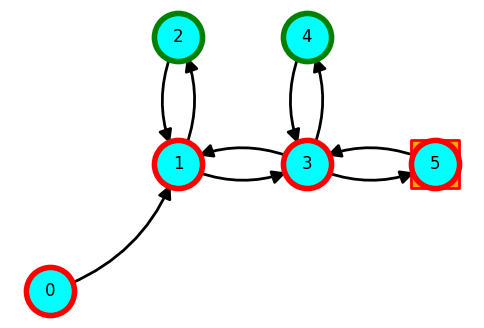

In [21]:
# Parameters
graph_edgedict = graph1_edgedict
graph_target = graph1_target
graph_pos = graph1_pos

# ---------------------------------------------------------------------------
# (1) Initialization
# (1-1) Prepare open_list as STACK, QUEUE, or XXXX(AI-2)
open_list = deque([State(0, cost=0, parent_id=-1)])
    # - open_list は "List(deque) of State" とする．
    #   - [] の中に State() を1つだけ入れており，そのリストで deque を初期化している．
    # - スタートは常に0番ノードにする．
    #   - いったんはcost = 0, parent_id = -1 ということにしておく．
    #   - 【重要】cost と parent_id は後で見直しが必要．

# (1-2) Prepare closed_list as DICT
closed_list = dict()
    # - closed_list は "Dict of State" とする．
    # - cf. This implementaion by dict might be easy and simple one.
    #       However, an implementation by list (static table) might
    #       be faster. As some algorithm contest, the dict implementation
    #       will be caused TLE (Time Limit Exceed)...

# DEBUG
print(f'(1) {open_list=}')
print(f'(1) {closed_list=}')


# ---------------------------------------------------------------------------
# (2) Loop until the open_list is empty
#     (Loop while(if) the open_list is not empty)
loop_count = 0
while len(open_list) > 0 and loop_count < 100:
    # - open_listに要素がある限り，ループし続ける
    # - 安全のため，loop_count が増えすぎてるなら，タイムアウトとして止める．
    #   **初期の100では，探索対象のグラフによっては少なすぎるかもしれないので，注意．**
    # - なお，例年 while 文が苦手という人がいるようですが・・・
    #   while文は，if文とほぼ同じです．条件が成立するなら内部を実行する，です．
    #   ただし，if文は内部を実行終えたら，そこで終わるが，while文は条件判定に戻る．
    #   cf. アセンブラで言えば，if でも while でも，beqによる条件分岐があるのは同じだが，
    #       while は最後に j whie_loop を置くことでループ構造を実現する．
    #       https://www.swlab.cs.okayama-u.ac.jp/~nom/lect/p3/dat/examples/ans-practice5-1.s 

    loop_count += 1;
    print(f'\n----- LOOP = {loop_count}')

    # -----------------------------------------------------------------------
    # (3) Set current state for search algorithm
    cur_state = open_list.pop()   # POP as STACK

    #     DEBUG
    print(f'(3) {cur_state=}')
    print(f'(3) {open_list=}')

    # -----------------------------------------------------------------------
    # (4) Update closed_list
    assert cur_state.id not in closed_list, f'REVISITED: {cur_state.id=} should not in {closed_list=}'
        # - assert は条件を満たしていないときに処理を止める関数です
        #   - アルゴリズムとして必要なのではなく，検証 (validation) の一種です．
        # - 後述の (7-1) や (7-2) で適切な処理をしていない場合は，
        #   ここで "再訪(revisit)" してしまう場合があります．
        #   - "再訪" になってしまう場合は，ここで処理を加えるよりは (7) を見直しましょう．
        # - ただし・・・どうしても解決できない（か，独自に考えているアルゴリズムであり，
        #   ここでの再訪相当を適切に処理することにした）なら，この assert を除いてください．
        #   - それはそれで，考察できることは増えると思いますので．．．

    closed_list[cur_state.id] = cur_state
        # - closed_list に記録を残します．
        # - 本講義で想定しているアルゴリズムであれば，ここでは上書きは起こりません．
        #   - 上述の通り，アルゴリズムによっては，何らかの条件分岐が必要かもしれません．

    #     DEBUG
    print(f'(4) {closed_list=}')

    # -----------------------------------------------------------------------
    # (5) Check whether reaching the target (goal) or not
    if graph_target in closed_list:
        # Python の独特な条件式です．graph_target と一致する要素が，
        # closed_list のキーに含まれているかどうかのチェックをしています．

        print('\n**** I have reached the target node!!\n')
        break
            # この終了条件は，今後必要に応じて見直しが必要になるでしょう．
            # 【発展】ここで終了しなくても，解説A3の経路探索は実現できる．
            #         （終了すべきでない，とまでは言っていません．考察課題です．）

    # -----------------------------------------------------------------------
    # (6) Find adjacent nodes
    candidate_state_nodes = graph_edgedict[cur_state.id]
        # - cur_stateのノードの隣接ノードは，graph_edgedict を辞書引きすればよい
        # - この時点では candidate_state_nodes は (dst_id, weight) のタプルである．

    #     DEBUG
    print(f'(6) {candidate_state_nodes=}')

    # -----------------------------------------------------------------------
    # (7) Update open_list
    for _dst_id, _weight in candidate_state_nodes:
        candidate_state = State(
            id=_dst_id,
            cost=0,       # TODO: 解説A5 & A6 (AI-2)
            parent_id=-1  # TODO: 解説A3
        )
            # - for ループを使い，候補となるノードを追加したい．効率は無視．
            #   - 候補となるノードは，[解説A2]時点では，id (ノードID)しか情報を持っていない．
            #   - parent_id は，次の[解説A3]で考え直す必要がある．
            #   - cost は，AI-2で考え直す必要がある．
            # - 以降，_candidate_node を open_list に追加してよいかどうか，
            #   を判定してから，最終的に，open_list へ追加する．

        # (7-1) Ignore the candidate, if it existing in closed _list
        #   Note: We should reconsider this process, if try to implement A* algorithm
        if candidate_state.id in closed_list:
            continue
                # - closed_list は dict 型なので in 演算子で存在の判定ができる
                # - _dst_id が探索済みのノード（closed_list内のノード）である
                #    ==> open_listには追加しない．
                #    ==> "continue" により，以降の処理は実行せず，forループを継続する

        # (7-2) Ignore the candidate, if it existing in open_list
        #   Note: We must reconsider this process at AI-2
        _exist_state = [x for x in open_list if x.id == candidate_state.id]
        _exist_state = _exist_state[0] if _exist_state else None
        if _exist_state is None:
                # - 本講義だけでは，この3行の条件判定の解説は難しいので，深入りしないで構いません．
                # - この処理では，open_list 内の全探索状態に candidate_state.id と同じIDがあれば，
                #   _exist_state として，open_list の1要素が得られます．無ければ None です．

            open_list.append(candidate_state)
                # - _dst_id は探索待ちのノード（open_list内のノード）ではない
                #    ==> open_list に追加する

        else:
            pass
                # - open_list に _dst_id と同じ id の状態データが存在する
                #    ==> (AI-1では) open_listには追加しない．
                #
                # 【重要】AI-2で cost も踏まえた再検討をする．次回のTutorial 3 も注意深く確認しよう．

    print(f'(7) {open_list=}')

# -----------------------------------------------------------------------
# DEBUG: draw the Graph
ebai.draw_graph_structure(graph_edgedict, graph_pos, graph_target,
                          open_list=open_list, closed_list=closed_list)
    # - 先ほどの描画例に加えて，open_list, closed_list も追加している
    #   - 適宜，引数を与えずに描画するなどして，描かれた図の各シンボルが
    #     何を表しているのか，理解をしてください．
    # - ループ込みの完成版であれば，ループ内で毎回描画するのは，無駄である．
    #   必要な場所でのみ，描画すれば十分であろう．
    # **********
    # 【注意】
    # fig?.savefig()を利用した画像保存をする際は，十分に注意を払ってください．
    # ループ内での savefig() 呼び出しは，大量のネットワーク経由のデータ転送と，
    # 共有ディスクの大量消費をする可能性があり，ほかの学生の受講の妨げになります．
    # （あなたの端末だけでなく，演習室の全端末がハングアップする可能性があります．）
    # **********


(Step-A3)=

## [解説A3] 経路探索

迷路問題として考えるなら，どのノードを通って，ゴールにたどり着いたか，調べておきたいところです．

`closed_list` には，そのすべての過程を記録しておくことにしましょう．  
あとは，`closed_list` から，Backtrackingにより，最短の経路を得ることを考えてみましょう．


### (1) Parent node の導入

これまで，利用してこなかったノードのメンバ `parent_id` を有効利用します．

例えば，`cur_state` が 1番ノードで，隣接行列を参照した結果，`candidate_state` が 2, 3番ノードだったとしましょう．  
探索過程では，その2, 3番ノードの情報を，`State` データクラスのデータとして，オープンリスト（や，クローズドリスト）に格納するタイミングがありました．  
ですから，そのタイミングにて，2, 3番ノードの付加情報として，parent_id = 1 と覚えさせればいい，ということです．（参照：スライド#19）

:::{exercise}

whileループ版のプログラムができていて，正しく理解できていれば，簡単なはずです．（解説コメントとしても，後で書き換えが必要な旨は述べています．）

[解説A2]で作成したプログラムを以下にコピーし，必要な個所を書き換えてみましょう．
:::

(1) open_list=deque([State(id=0, cost=0, parent_id=-1)])
(1) closed_list={}

----- LOOP = 1
(3) cur_state=State(id=0, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=1, cost=0, parent_id=0)])

----- LOOP = 2
(3) cur_state=State(id=1, cost=0, parent_id=0)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0)}
(6) candidate_state_nodes=[(2, 1.0), (3, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=3, cost=0, parent_id=1)])

----- LOOP = 3
(3) cur_state=State(id=3, cost=0, parent_id=1)
(3) open_list=deque([State(id=2, cost=0, parent_id=1)])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0), 3: State(id=3, cost=0, parent_id=1)}
(6) candidate_state_nodes=[(1, 1.0), (4, 1.0), (5, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=4, 

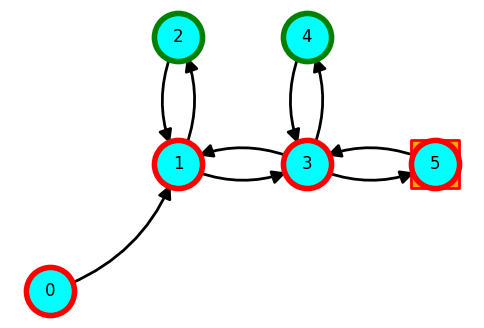

In [22]:
# GRAPH SEARCH ALGORITHM using STACK (w/ parent_node)
# --> Write your code
# Parameters
graph_edgedict = graph1_edgedict
graph_target = graph1_target
graph_pos = graph1_pos

# ---------------------------------------------------------------------------
# (1) Initialization
# (1-1) Prepare open_list as STACK, QUEUE, or XXXX(AI-2)
open_list = deque([State(0, cost=0, parent_id=-1)])
    # - open_list は "List(deque) of State" とする．
    #   - [] の中に State() を1つだけ入れており，そのリストで deque を初期化している．
    # - スタートは常に0番ノードにする．
    #   - いったんはcost = 0, parent_id = -1 ということにしておく．
    #   - 【重要】cost と parent_id は後で見直しが必要．

# (1-2) Prepare closed_list as DICT
closed_list = dict()
    # - closed_list は "Dict of State" とする．
    # - cf. This implementaion by dict might be easy and simple one.
    #       However, an implementation by list (static table) might
    #       be faster. As some algorithm contest, the dict implementation
    #       will be caused TLE (Time Limit Exceed)...

# DEBUG
print(f'(1) {open_list=}')
print(f'(1) {closed_list=}')


# ---------------------------------------------------------------------------
# (2) Loop until the open_list is empty
#     (Loop while(if) the open_list is not empty)
loop_count = 0
while len(open_list) > 0 and loop_count < 100:
    # - open_listに要素がある限り，ループし続ける
    # - 安全のため，loop_count が増えすぎてるなら，タイムアウトとして止める．
    #   **初期の100では，探索対象のグラフによっては少なすぎるかもしれないので，注意．**
    # - なお，例年 while 文が苦手という人がいるようですが・・・
    #   while文は，if文とほぼ同じです．条件が成立するなら内部を実行する，です．
    #   ただし，if文は内部を実行終えたら，そこで終わるが，while文は条件判定に戻る．
    #   cf. アセンブラで言えば，if でも while でも，beqによる条件分岐があるのは同じだが，
    #       while は最後に j whie_loop を置くことでループ構造を実現する．
    #       https://www.swlab.cs.okayama-u.ac.jp/~nom/lect/p3/dat/examples/ans-practice5-1.s 

    loop_count += 1;
    print(f'\n----- LOOP = {loop_count}')

    # -----------------------------------------------------------------------
    # (3) Set current state for search algorithm
    cur_state = open_list.pop()   # POP as STACK

    #     DEBUG
    print(f'(3) {cur_state=}')
    print(f'(3) {open_list=}')

    # -----------------------------------------------------------------------
    # (4) Update closed_list
    assert cur_state.id not in closed_list, f'REVISITED: {cur_state.id=} should not in {closed_list=}'
        # - assert は条件を満たしていないときに処理を止める関数です
        #   - アルゴリズムとして必要なのではなく，検証 (validation) の一種です．
        # - 後述の (7-1) や (7-2) で適切な処理をしていない場合は，
        #   ここで "再訪(revisit)" してしまう場合があります．
        #   - "再訪" になってしまう場合は，ここで処理を加えるよりは (7) を見直しましょう．
        # - ただし・・・どうしても解決できない（か，独自に考えているアルゴリズムであり，
        #   ここでの再訪相当を適切に処理することにした）なら，この assert を除いてください．
        #   - それはそれで，考察できることは増えると思いますので．．．

    closed_list[cur_state.id] = cur_state
        # - closed_list に記録を残します．
        # - 本講義で想定しているアルゴリズムであれば，ここでは上書きは起こりません．
        #   - 上述の通り，アルゴリズムによっては，何らかの条件分岐が必要かもしれません．

    #     DEBUG
    print(f'(4) {closed_list=}')

    # -----------------------------------------------------------------------
    # (5) Check whether reaching the target (goal) or not
    if graph_target in closed_list:
        # Python の独特な条件式です．graph_target と一致する要素が，
        # closed_list のキーに含まれているかどうかのチェックをしています．

        print('\n**** I have reached the target node!!\n')
        break
            # この終了条件は，今後必要に応じて見直しが必要になるでしょう．
            # 【発展】ここで終了しなくても，解説A3の経路探索は実現できる．
            #         （終了すべきでない，とまでは言っていません．考察課題です．）

    # -----------------------------------------------------------------------
    # (6) Find adjacent nodes
    candidate_state_nodes = graph_edgedict[cur_state.id]
        # - cur_stateのノードの隣接ノードは，graph_edgedict を辞書引きすればよい
        # - この時点では candidate_state_nodes は (dst_id, weight) のタプルである．

    #     DEBUG
    print(f'(6) {candidate_state_nodes=}')

    # -----------------------------------------------------------------------
    # (7) Update open_list
    for _dst_id, _weight in candidate_state_nodes:
        candidate_state = State(
            id=_dst_id,
            cost=0,       # TODO: 解説A5 & A6 (AI-2)
            parent_id=cur_state.id  # TODO: 解説A3
        )
            # - for ループを使い，候補となるノードを追加したい．効率は無視．
            #   - 候補となるノードは，[解説A2]時点では，id (ノードID)しか情報を持っていない．
            #   - parent_id は，次の[解説A3]で考え直す必要がある．
            #   - cost は，AI-2で考え直す必要がある．
            # - 以降，_candidate_node を open_list に追加してよいかどうか，
            #   を判定してから，最終的に，open_list へ追加する．

        # (7-1) Ignore the candidate, if it existing in closed _list
        #   Note: We should reconsider this process, if try to implement A* algorithm
        if candidate_state.id in closed_list:
            continue
                # - closed_list は dict 型なので in 演算子で存在の判定ができる
                # - _dst_id が探索済みのノード（closed_list内のノード）である
                #    ==> open_listには追加しない．
                #    ==> "continue" により，以降の処理は実行せず，forループを継続する

        # (7-2) Ignore the candidate, if it existing in open_list
        #   Note: We must reconsider this process at AI-2
        _exist_state = [x for x in open_list if x.id == candidate_state.id]
        _exist_state = _exist_state[0] if _exist_state else None
        if _exist_state is None:
                # - 本講義だけでは，この3行の条件判定の解説は難しいので，深入りしないで構いません．
                # - この処理では，open_list 内の全探索状態に candidate_state.id と同じIDがあれば，
                #   _exist_state として，open_list の1要素が得られます．無ければ None です．

            open_list.append(candidate_state)
                # - _dst_id は探索待ちのノード（open_list内のノード）ではない
                #    ==> open_list に追加する

        else:
            pass
                # - open_list に _dst_id と同じ id の状態データが存在する
                #    ==> (AI-1では) open_listには追加しない．
                #
                # 【重要】AI-2で cost も踏まえた再検討をする．次回のTutorial 3 も注意深く確認しよう．

    print(f'(7) {open_list=}')

# -----------------------------------------------------------------------
# DEBUG: draw the Graph
ebai.draw_graph_structure(graph_edgedict, graph_pos, graph_target,
                          open_list=open_list, closed_list=closed_list)
    # - 先ほどの描画例に加えて，open_list, closed_list も追加している
    #   - 適宜，引数を与えずに描画するなどして，描かれた図の各シンボルが
    #     何を表しているのか，理解をしてください．
    # - ループ込みの完成版であれば，ループ内で毎回描画するのは，無駄である．
    #   必要な場所でのみ，描画すれば十分であろう．
    # **********
    # 【注意】
    # fig?.savefig()を利用した画像保存をする際は，十分に注意を払ってください．
    # ループ内での savefig() 呼び出しは，大量のネットワーク経由のデータ転送と，
    # 共有ディスクの大量消費をする可能性があり，ほかの学生の受講の妨げになります．
    # （あなたの端末だけでなく，演習室の全端末がハングアップする可能性があります．）
    # **********


### (2) Backtracking

探索途中で親ノードを覚えておくようにすれば， backtracking によって，ゴールからスタートに戻ることができます．  
このことを利用すれば，スタートからゴールの経路も容易に得られます．（参照：講義スライド#18-19）

Backtracking の基本形は，以下のようなプログラムとなるでしょう．

:::{exercise}
:label: impl-backtracking

以下の `backtrack()` の実装は未完成です．  
講義資料やこれまでの実装の考えを振り返りながら，「成功の条件」や「後で必要になるbacktrackの結果」などを自分でよく考えて，実装として書き加えてください．

a) 「Backtracking 成功」にかかる条件分岐は未完成です．  
b) 戻り値は現在は空の tuple ですが，何らかの戻り値を得れば，後で使いまわせるかもしれません．（bは次回以降に考えても構いません）

:::

In [23]:
#
# Backtracking
#
def backtrack(closed_list, graph_target, graph_start):
    """ BACKTRACK
    PARAMETERS
    ----------
    closed_list
        グラフ探索で得られたクローズドリスト
    graph_target
        グラフ探索におけるゴールとなるノードのID
    graph_start (default: 0)
        グラフ探索におけるスタートとなるノードのID

    RETURNS
    -------
    ????
        ????
    ????
        ????

    NOTE
    ----
    - return は各自で考えよう．
      - 何も戻さない方針なら return 文をなくして，上記 RETURNS については，None とでも書いておけばよい
    """
    # parameters
    route = deque([])
        # - route にノード情報を追加していく．
        # - 追加と利用の考え方は，システムプログラミングの関数呼び出しにおけるスタックと同じ考え方．
    
    bt_node_id = graph_target
        # - ゴールから逆にたどるので，ゴールのノード番号を入れておく
        # - bt は backtracking の略です．
    
    # Debug
    print(f'DEBUG: {bt_node_id=}')
    while bt_node_id >= 0:
        # - 本資料では，ソースノードは，常に0番ノードと仮定していることを思い出そう．
        #   - ソースノードは，Backtracking 処理におけるゴールに相当する．
        # - != 0 でも問題はないが・・・もう少し考えてみよう
        #   - 実際のところ，（正常な）ノードID としては，正の値しか使っていない．
        #   - そこで，先を見越して，広く設定しておこう．この条件ならば「正常でない」の意味で，
        #     マイナス番号のノードIDをプログラマが意図的に利用することもできる．
    
        route.appendleft(bt_node_id)
            # - 先頭に追加していく．
    
        # Debug
        print(f'DEBUG: {route=}')
    
        bt_node_id = closed_list.get(bt_node_id, State(id=-1, cost=-1, parent_id=-9)).parent_id
            # - dict.getは，辞書引きをする際にkeyが見つからなければ，第2引数をdefault値としてを返す
    
        # Debug
        print(f'DEBUG: {bt_node_id=}')
    
    if bt_node_id <= graph_start:
            # ⇒ a) Backtracking 成功は，どんな条件になるでしょうか？
            #   自分でif文を書き換えてください．
        # Backtracking 成功
        print(f'Backtracking: Success: Route = {list(route)}')
    else:
        # Backtracking失敗
        print(f'Backtracking: Failed: Route = {list(route)}?')

    # Debug
    print('\n-----')

    return list(route)
            # ⇒ b) 何を返すのがよいか，は自分でよく考えてください．
            #       （何も返さないという方針も当然あり得ますが，考えを示す必要があります．）

#
# Test your function
#
print(f'DEBUG: {graph_target=}')
display(closed_list)
    # - 探索"成功"時の closed_list を使います．セルの中でも，簡単に中身を確認しておくといいでしょう．
    # - なお，"成功"していないときの動作は，未定義です．所望のBacktrackingの結果は得られないでしょう．

print('TEST BACKTRACKING --------')
backtrack(closed_list, graph_target, 0)
    # - 関数のデバッグをしたいなら，右サイドバーの虫アイコンを押して，デバッガを起動し，
    #   ブレークポイント設置とステップ実行をするとよいでしょう．


DEBUG: graph_target=5


{0: State(id=0, cost=0, parent_id=-1),
 1: State(id=1, cost=0, parent_id=0),
 3: State(id=3, cost=0, parent_id=1),
 5: State(id=5, cost=0, parent_id=3)}

TEST BACKTRACKING --------
DEBUG: bt_node_id=5
DEBUG: route=deque([5])
DEBUG: bt_node_id=3
DEBUG: route=deque([3, 5])
DEBUG: bt_node_id=1
DEBUG: route=deque([1, 3, 5])
DEBUG: bt_node_id=0
DEBUG: route=deque([0, 1, 3, 5])
DEBUG: bt_node_id=-1
Backtracking: Success: Route = [0, 1, 3, 5]

-----


[0, 1, 3, 5]

### «PRACTICES»

:::{important} PRACTICE &star;
`backtrack()` 関数を完成させてください．

> &starf;発展&starf;  
> backtracking はある種の探索と等価といえそうです．このことについて考察してください．
:::

:::{important} PRACTICE &star;
1つのセル内で，グラフ探索を行い，さらに `backtrack()` 関数の結果を得てください．  
それらの処理の結果として，「探索対象のグラフの描画」と「スタートからゴールまでの経路の表示」を実現してください．  

  - 経路の表示として，少なくとも「経路を保持する変数名」と「変数の中身」が分かるような print (or display) をしてください．

> &starf;発展&starf;  
> `ebai.ebai.draw_graph_structure()` を適切に利用すれば，探索された経路のハイライト表示も加えることができる．  
>
>  （ハイライトの追加に固執して，本来成すべき，経路情報をprintで表示する，ということを忘れないように．．．）
:::

(1) open_list=deque([State(id=0, cost=0, parent_id=-1)])
(1) closed_list={}

----- LOOP = 1
(3) cur_state=State(id=0, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=1, cost=0, parent_id=0)])

----- LOOP = 2
(3) cur_state=State(id=1, cost=0, parent_id=0)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0)}
(6) candidate_state_nodes=[(2, 1.0), (3, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=3, cost=0, parent_id=1)])

----- LOOP = 3
(3) cur_state=State(id=3, cost=0, parent_id=1)
(3) open_list=deque([State(id=2, cost=0, parent_id=1)])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0), 3: State(id=3, cost=0, parent_id=1)}
(6) candidate_state_nodes=[(1, 1.0), (4, 1.0), (5, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=4, 

{0: State(id=0, cost=0, parent_id=-1),
 1: State(id=1, cost=0, parent_id=0),
 3: State(id=3, cost=0, parent_id=1),
 5: State(id=5, cost=0, parent_id=3)}

TEST BACKTRACKING --------
DEBUG: bt_node_id=5
DEBUG: route=deque([5])
DEBUG: bt_node_id=3
DEBUG: route=deque([3, 5])
DEBUG: bt_node_id=1
DEBUG: route=deque([1, 3, 5])
DEBUG: bt_node_id=0
DEBUG: route=deque([0, 1, 3, 5])
DEBUG: bt_node_id=-1
Backtracking: Success: Route = [0, 1, 3, 5]

-----


[0, 1, 3, 5]

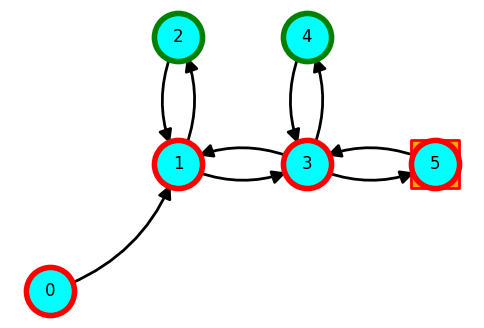

In [24]:
# Show the Graph
# GRAPH SEARCH ALGORITHM using STACK (w/ parent_node)
# --> Write your code
# Parameters
graph_edgedict = graph1_edgedict
graph_target = graph1_target
graph_pos = graph1_pos

# ---------------------------------------------------------------------------
# (1) Initialization
# (1-1) Prepare open_list as STACK, QUEUE, or XXXX(AI-2)
open_list = deque([State(0, cost=0, parent_id=-1)])
    # - open_list は "List(deque) of State" とする．
    #   - [] の中に State() を1つだけ入れており，そのリストで deque を初期化している．
    # - スタートは常に0番ノードにする．
    #   - いったんはcost = 0, parent_id = -1 ということにしておく．
    #   - 【重要】cost と parent_id は後で見直しが必要．

# (1-2) Prepare closed_list as DICT
closed_list = dict()
    # - closed_list は "Dict of State" とする．
    # - cf. This implementaion by dict might be easy and simple one.
    #       However, an implementation by list (static table) might
    #       be faster. As some algorithm contest, the dict implementation
    #       will be caused TLE (Time Limit Exceed)...

# DEBUG
print(f'(1) {open_list=}')
print(f'(1) {closed_list=}')


# ---------------------------------------------------------------------------
# (2) Loop until the open_list is empty
#     (Loop while(if) the open_list is not empty)
loop_count = 0
while len(open_list) > 0 and loop_count < 100:
    # - open_listに要素がある限り，ループし続ける
    # - 安全のため，loop_count が増えすぎてるなら，タイムアウトとして止める．
    #   **初期の100では，探索対象のグラフによっては少なすぎるかもしれないので，注意．**
    # - なお，例年 while 文が苦手という人がいるようですが・・・
    #   while文は，if文とほぼ同じです．条件が成立するなら内部を実行する，です．
    #   ただし，if文は内部を実行終えたら，そこで終わるが，while文は条件判定に戻る．
    #   cf. アセンブラで言えば，if でも while でも，beqによる条件分岐があるのは同じだが，
    #       while は最後に j whie_loop を置くことでループ構造を実現する．
    #       https://www.swlab.cs.okayama-u.ac.jp/~nom/lect/p3/dat/examples/ans-practice5-1.s 

    loop_count += 1;
    print(f'\n----- LOOP = {loop_count}')

    # -----------------------------------------------------------------------
    # (3) Set current state for search algorithm
    cur_state = open_list.pop()   # POP as STACK

    #     DEBUG
    print(f'(3) {cur_state=}')
    print(f'(3) {open_list=}')

    # -----------------------------------------------------------------------
    # (4) Update closed_list
    assert cur_state.id not in closed_list, f'REVISITED: {cur_state.id=} should not in {closed_list=}'
        # - assert は条件を満たしていないときに処理を止める関数です
        #   - アルゴリズムとして必要なのではなく，検証 (validation) の一種です．
        # - 後述の (7-1) や (7-2) で適切な処理をしていない場合は，
        #   ここで "再訪(revisit)" してしまう場合があります．
        #   - "再訪" になってしまう場合は，ここで処理を加えるよりは (7) を見直しましょう．
        # - ただし・・・どうしても解決できない（か，独自に考えているアルゴリズムであり，
        #   ここでの再訪相当を適切に処理することにした）なら，この assert を除いてください．
        #   - それはそれで，考察できることは増えると思いますので．．．

    closed_list[cur_state.id] = cur_state
        # - closed_list に記録を残します．
        # - 本講義で想定しているアルゴリズムであれば，ここでは上書きは起こりません．
        #   - 上述の通り，アルゴリズムによっては，何らかの条件分岐が必要かもしれません．

    #     DEBUG
    print(f'(4) {closed_list=}')

    # -----------------------------------------------------------------------
    # (5) Check whether reaching the target (goal) or not
    if graph_target in closed_list:
        # Python の独特な条件式です．graph_target と一致する要素が，
        # closed_list のキーに含まれているかどうかのチェックをしています．

        print('\n**** I have reached the target node!!\n')
        break
            # この終了条件は，今後必要に応じて見直しが必要になるでしょう．
            # 【発展】ここで終了しなくても，解説A3の経路探索は実現できる．
            #         （終了すべきでない，とまでは言っていません．考察課題です．）

    # -----------------------------------------------------------------------
    # (6) Find adjacent nodes
    candidate_state_nodes = graph_edgedict[cur_state.id]
        # - cur_stateのノードの隣接ノードは，graph_edgedict を辞書引きすればよい
        # - この時点では candidate_state_nodes は (dst_id, weight) のタプルである．

    #     DEBUG
    print(f'(6) {candidate_state_nodes=}')

    # -----------------------------------------------------------------------
    # (7) Update open_list
    for _dst_id, _weight in candidate_state_nodes:
        candidate_state = State(
            id=_dst_id,
            cost=0,       # TODO: 解説A5 & A6 (AI-2)
            parent_id=cur_state.id  # TODO: 解説A3
        )
            # - for ループを使い，候補となるノードを追加したい．効率は無視．
            #   - 候補となるノードは，[解説A2]時点では，id (ノードID)しか情報を持っていない．
            #   - parent_id は，次の[解説A3]で考え直す必要がある．
            #   - cost は，AI-2で考え直す必要がある．
            # - 以降，_candidate_node を open_list に追加してよいかどうか，
            #   を判定してから，最終的に，open_list へ追加する．

        # (7-1) Ignore the candidate, if it existing in closed _list
        #   Note: We should reconsider this process, if try to implement A* algorithm
        if candidate_state.id in closed_list:
            continue
                # - closed_list は dict 型なので in 演算子で存在の判定ができる
                # - _dst_id が探索済みのノード（closed_list内のノード）である
                #    ==> open_listには追加しない．
                #    ==> "continue" により，以降の処理は実行せず，forループを継続する

        # (7-2) Ignore the candidate, if it existing in open_list
        #   Note: We must reconsider this process at AI-2
        _exist_state = [x for x in open_list if x.id == candidate_state.id]
        _exist_state = _exist_state[0] if _exist_state else None
        if _exist_state is None:
                # - 本講義だけでは，この3行の条件判定の解説は難しいので，深入りしないで構いません．
                # - この処理では，open_list 内の全探索状態に candidate_state.id と同じIDがあれば，
                #   _exist_state として，open_list の1要素が得られます．無ければ None です．

            open_list.append(candidate_state)
                # - _dst_id は探索待ちのノード（open_list内のノード）ではない
                #    ==> open_list に追加する

        else:
            pass
                # - open_list に _dst_id と同じ id の状態データが存在する
                #    ==> (AI-1では) open_listには追加しない．
                #
                # 【重要】AI-2で cost も踏まえた再検討をする．次回のTutorial 3 も注意深く確認しよう．

    print(f'(7) {open_list=}')

# -----------------------------------------------------------------------
# DEBUG: draw the Graph
ebai.draw_graph_structure(graph_edgedict, graph_pos, graph_target,
                          open_list=open_list, closed_list=closed_list)
    # - 先ほどの描画例に加えて，open_list, closed_list も追加している
    #   - 適宜，引数を与えずに描画するなどして，描かれた図の各シンボルが
    #     何を表しているのか，理解をしてください．
    # - ループ込みの完成版であれば，ループ内で毎回描画するのは，無駄である．
    #   必要な場所でのみ，描画すれば十分であろう．
    # **********
    # 【注意】
    # fig?.savefig()を利用した画像保存をする際は，十分に注意を払ってください．
    # ループ内での savefig() 呼び出しは，大量のネットワーク経由のデータ転送と，
    # 共有ディスクの大量消費をする可能性があり，ほかの学生の受講の妨げになります．
    # （あなたの端末だけでなく，演習室の全端末がハングアップする可能性があります．）
    # **********

# Show the Result of Backtracking

#
# Backtracking
#
def backtrack(closed_list, graph_target, graph_start):
    """ BACKTRACK
    PARAMETERS
    ----------
    closed_list
        グラフ探索で得られたクローズドリスト
    graph_target
        グラフ探索におけるゴールとなるノードのID
    graph_start (default: 0)
        グラフ探索におけるスタートとなるノードのID

    RETURNS
    -------
    ????
        ????
    ????
        ????

    NOTE
    ----
    - return は各自で考えよう．
      - 何も戻さない方針なら return 文をなくして，上記 RETURNS については，None とでも書いておけばよい
    """
    # parameters
    route = deque([])
        # - route にノード情報を追加していく．
        # - 追加と利用の考え方は，システムプログラミングの関数呼び出しにおけるスタックと同じ考え方．
    
    bt_node_id = graph_target
        # - ゴールから逆にたどるので，ゴールのノード番号を入れておく
        # - bt は backtracking の略です．
    
    # Debug
    print(f'DEBUG: {bt_node_id=}')
    while bt_node_id >= 0:
        # - 本資料では，ソースノードは，常に0番ノードと仮定していることを思い出そう．
        #   - ソースノードは，Backtracking 処理におけるゴールに相当する．
        # - != 0 でも問題はないが・・・もう少し考えてみよう
        #   - 実際のところ，（正常な）ノードID としては，正の値しか使っていない．
        #   - そこで，先を見越して，広く設定しておこう．この条件ならば「正常でない」の意味で，
        #     マイナス番号のノードIDをプログラマが意図的に利用することもできる．
    
        route.appendleft(bt_node_id)
            # - 先頭に追加していく．
    
        # Debug
        print(f'DEBUG: {route=}')
    
        bt_node_id = closed_list.get(bt_node_id, State(id=-1, cost=-1, parent_id=-9)).parent_id
            # - dict.getは，辞書引きをする際にkeyが見つからなければ，第2引数をdefault値としてを返す
    
        # Debug
        print(f'DEBUG: {bt_node_id=}')
    
    if bt_node_id <= graph_start:
            # ⇒ a) Backtracking 成功は，どんな条件になるでしょうか？
            #   自分でif文を書き換えてください．
        # Backtracking 成功
        print(f'Backtracking: Success: Route = {list(route)}')
    else:
        # Backtracking失敗
        print(f'Backtracking: Failed: Route = {list(route)}?')

    # Debug
    print('\n-----')

    return list(route)
            # ⇒ b) 何を返すのがよいか，は自分でよく考えてください．
            #       （何も返さないという方針も当然あり得ますが，考えを示す必要があります．）

#
# Test your function
#
print(f'DEBUG: {graph_target=}')
display(closed_list)
    # - 探索"成功"時の closed_list を使います．セルの中でも，簡単に中身を確認しておくといいでしょう．
    # - なお，"成功"していないときの動作は，未定義です．所望のBacktrackingの結果は得られないでしょう．

print('TEST BACKTRACKING --------')
backtrack(closed_list, graph_target, 0)
    # - 関数のデバッグをしたいなら，右サイドバーの虫アイコンを押して，デバッガを起動し，
    #   ブレークポイント設置とステップ実行をするとよいでしょう．


:::{attention}
日報の段階で，↑ までは必ず終わらせる・・・というつもりで進めてください．

また，次回以降の時間の余裕を得るため，解説A4も次回講義前までに，できる限り終わらせておくことを，強く推奨します．
:::

(Step-A4)=

## [解説A4] 幅優先探索（横探索）と深さ優先探索（縦探索）

ここまでの例では，オープンリストとして，Stack データ構造を用いた実装例を示しました．  
オープンリストとして，Queue データ構造を利用すると，どのような探索アルゴリズムになるでしょうか？

利用したデータ構造により「幅優先探索（横探索）」と「深さ優先探索（縦探索）」のいずれかに相当するはずです．（参照：スライド#12）

### «PRACTICES»

:::{important} PRACTICE &star;
オープンリストとして Queue データ構造を採用した場合のグラフ探索処理を1つのセルで完結させ，レポートに記載してください．
  - Backtracking の結果も忘れずに示してください．

> ★発展★  
> 適切な粒度で関数を設計すれば，様々な条件での実験が行いやすくなる．

:::

:::{important} PRACTICE &star;
Queue と Stack の使い分けにより，それぞれどのような探索アルゴリズムが実現されているか，説明してください．

> ★発展★  
> Graph1以外のグラフ構造で実験を行うことで，実装の信頼性は増す．もちろん，説明や考察の信頼性も増す．  
> ただし，むやみに変えればいいというものではない．意味のあるグラフの変更，あるいは追加を考えよう．  

> &starf;発展&starf;  
> オープンリストへの追加にかかる処理，例えば，(7-1) や (7-2) はなぜ必要なのだろうか？
> StackとQueueでその必要性に違いは出ないだろうか？
>
> 実験結果も踏まえて考察してみるとよい．
> （レポートでは，プログラムを示すとややこしいので，ｘｘの場合はｙｙのようになる，のように結果相当のみを示しても良い．）

:::

In [25]:
# Parameters
graph_edgedict = graph1_edgedict
graph_target = graph1_target
graph_pos = graph1_pos

(1) open_list=deque([State(id=0, cost=0, parent_id=-1)])
(1) closed_list={}

----- LOOP = 1
(3) cur_state=State(id=0, cost=0, parent_id=-1)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=1, cost=0, parent_id=0)])

----- LOOP = 2
(3) cur_state=State(id=1, cost=0, parent_id=0)
(3) open_list=deque([])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0)}
(6) candidate_state_nodes=[(2, 1.0), (3, 1.0)]
(7) open_list=deque([State(id=2, cost=0, parent_id=1), State(id=3, cost=0, parent_id=1)])

----- LOOP = 3
(3) cur_state=State(id=2, cost=0, parent_id=1)
(3) open_list=deque([State(id=3, cost=0, parent_id=1)])
(4) closed_list={0: State(id=0, cost=0, parent_id=-1), 1: State(id=1, cost=0, parent_id=0), 2: State(id=2, cost=0, parent_id=1)}
(6) candidate_state_nodes=[(1, 1.0)]
(7) open_list=deque([State(id=3, cost=0, parent_id=1)])

----- LOOP = 4
(3) cur_state=S

{0: State(id=0, cost=0, parent_id=-1),
 1: State(id=1, cost=0, parent_id=0),
 2: State(id=2, cost=0, parent_id=1),
 3: State(id=3, cost=0, parent_id=1),
 4: State(id=4, cost=0, parent_id=3),
 5: State(id=5, cost=0, parent_id=3)}

TEST BACKTRACKING --------
DEBUG: bt_node_id=5
DEBUG: route=deque([5])
DEBUG: bt_node_id=3
DEBUG: route=deque([3, 5])
DEBUG: bt_node_id=1
DEBUG: route=deque([1, 3, 5])
DEBUG: bt_node_id=0
DEBUG: route=deque([0, 1, 3, 5])
DEBUG: bt_node_id=-1
Backtracking: Success: Route = [0, 1, 3, 5]

-----


[0, 1, 3, 5]

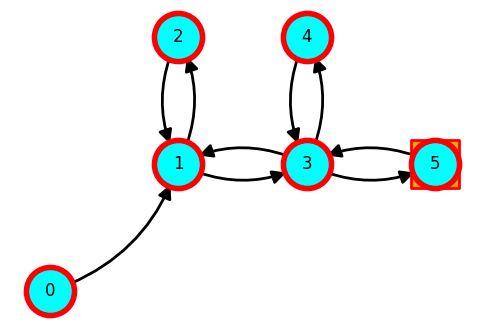

In [26]:
# ---------------------------------------------------------------------------
# (1) Initialization
# (1-1) Prepare open_list as STACK, QUEUE, or XXXX(AI-2)
open_list = deque([State(0, cost=0, parent_id=-1)])
    # - open_list は "List(deque) of State" とする．
    #   - [] の中に State() を1つだけ入れており，そのリストで deque を初期化している．
    # - スタートは常に0番ノードにする．
    #   - いったんはcost = 0, parent_id = -1 ということにしておく．
    #   - 【重要】cost と parent_id は後で見直しが必要．

# (1-2) Prepare closed_list as DICT
closed_list = dict()
    # - closed_list は "Dict of State" とする．
    # - cf. This implementaion by dict might be easy and simple one.
    #       However, an implementation by list (static table) might
    #       be faster. As some algorithm contest, the dict implementation
    #       will be caused TLE (Time Limit Exceed)...

# DEBUG
print(f'(1) {open_list=}')
print(f'(1) {closed_list=}')


# ---------------------------------------------------------------------------
# (2) Loop until the open_list is empty
#     (Loop while(if) the open_list is not empty)
loop_count = 0
while len(open_list) > 0 and loop_count < 100:
    # - open_listに要素がある限り，ループし続ける
    # - 安全のため，loop_count が増えすぎてるなら，タイムアウトとして止める．
    #   **初期の100では，探索対象のグラフによっては少なすぎるかもしれないので，注意．**
    # - なお，例年 while 文が苦手という人がいるようですが・・・
    #   while文は，if文とほぼ同じです．条件が成立するなら内部を実行する，です．
    #   ただし，if文は内部を実行終えたら，そこで終わるが，while文は条件判定に戻る．
    #   cf. アセンブラで言えば，if でも while でも，beqによる条件分岐があるのは同じだが，
    #       while は最後に j whie_loop を置くことでループ構造を実現する．
    #       https://www.swlab.cs.okayama-u.ac.jp/~nom/lect/p3/dat/examples/ans-practice5-1.s 

    loop_count += 1;
    print(f'\n----- LOOP = {loop_count}')

    # -----------------------------------------------------------------------
    # (3) Set current state for search algorithm
    cur_state = open_list.popleft()   # POP as STACK

    #     DEBUG
    print(f'(3) {cur_state=}')
    print(f'(3) {open_list=}')

    # -----------------------------------------------------------------------
    # (4) Update closed_list
    assert cur_state.id not in closed_list, f'REVISITED: {cur_state.id=} should not in {closed_list=}'
        # - assert は条件を満たしていないときに処理を止める関数です
        #   - アルゴリズムとして必要なのではなく，検証 (validation) の一種です．
        # - 後述の (7-1) や (7-2) で適切な処理をしていない場合は，
        #   ここで "再訪(revisit)" してしまう場合があります．
        #   - "再訪" になってしまう場合は，ここで処理を加えるよりは (7) を見直しましょう．
        # - ただし・・・どうしても解決できない（か，独自に考えているアルゴリズムであり，
        #   ここでの再訪相当を適切に処理することにした）なら，この assert を除いてください．
        #   - それはそれで，考察できることは増えると思いますので．．．

    closed_list[cur_state.id] = cur_state
        # - closed_list に記録を残します．
        # - 本講義で想定しているアルゴリズムであれば，ここでは上書きは起こりません．
        #   - 上述の通り，アルゴリズムによっては，何らかの条件分岐が必要かもしれません．

    #     DEBUG
    print(f'(4) {closed_list=}')

    # -----------------------------------------------------------------------
    # (5) Check whether reaching the target (goal) or not
    if graph_target in closed_list:
        # Python の独特な条件式です．graph_target と一致する要素が，
        # closed_list のキーに含まれているかどうかのチェックをしています．

        print('\n**** I have reached the target node!!\n')
        break
            # この終了条件は，今後必要に応じて見直しが必要になるでしょう．
            # 【発展】ここで終了しなくても，解説A3の経路探索は実現できる．
            #         （終了すべきでない，とまでは言っていません．考察課題です．）

    # -----------------------------------------------------------------------
    # (6) Find adjacent nodes
    candidate_state_nodes = graph_edgedict[cur_state.id]
        # - cur_stateのノードの隣接ノードは，graph_edgedict を辞書引きすればよい
        # - この時点では candidate_state_nodes は (dst_id, weight) のタプルである．

    #     DEBUG
    print(f'(6) {candidate_state_nodes=}')

    # -----------------------------------------------------------------------
    # (7) Update open_list
    for _dst_id, _weight in candidate_state_nodes:
        candidate_state = State(
            id=_dst_id,
            cost=0,       # TODO: 解説A5 & A6 (AI-2)
            parent_id=cur_state.id  # TODO: 解説A3
        )
            # - for ループを使い，候補となるノードを追加したい．効率は無視．
            #   - 候補となるノードは，[解説A2]時点では，id (ノードID)しか情報を持っていない．
            #   - parent_id は，次の[解説A3]で考え直す必要がある．
            #   - cost は，AI-2で考え直す必要がある．
            # - 以降，_candidate_node を open_list に追加してよいかどうか，
            #   を判定してから，最終的に，open_list へ追加する．

        # (7-1) Ignore the candidate, if it existing in closed _list
        #   Note: We should reconsider this process, if try to implement A* algorithm
        if candidate_state.id in closed_list:
            continue
                # - closed_list は dict 型なので in 演算子で存在の判定ができる
                # - _dst_id が探索済みのノード（closed_list内のノード）である
                #    ==> open_listには追加しない．
                #    ==> "continue" により，以降の処理は実行せず，forループを継続する

        # (7-2) Ignore the candidate, if it existing in open_list
        #   Note: We must reconsider this process at AI-2
        _exist_state = [x for x in open_list if x.id == candidate_state.id]
        _exist_state = _exist_state[0] if _exist_state else None
        if _exist_state is None:
                # - 本講義だけでは，この3行の条件判定の解説は難しいので，深入りしないで構いません．
                # - この処理では，open_list 内の全探索状態に candidate_state.id と同じIDがあれば，
                #   _exist_state として，open_list の1要素が得られます．無ければ None です．

            open_list.append(candidate_state)
                # - _dst_id は探索待ちのノード（open_list内のノード）ではない
                #    ==> open_list に追加する

        else:
            pass
                # - open_list に _dst_id と同じ id の状態データが存在する
                #    ==> (AI-1では) open_listには追加しない．
                #
                # 【重要】AI-2で cost も踏まえた再検討をする．次回のTutorial 3 も注意深く確認しよう．

    print(f'(7) {open_list=}')

# -----------------------------------------------------------------------
# DEBUG: draw the Graph
ebai.draw_graph_structure(graph_edgedict, graph_pos, graph_target,
                          open_list=open_list, closed_list=closed_list)
    # - 先ほどの描画例に加えて，open_list, closed_list も追加している
    #   - 適宜，引数を与えずに描画するなどして，描かれた図の各シンボルが
    #     何を表しているのか，理解をしてください．
    # - ループ込みの完成版であれば，ループ内で毎回描画するのは，無駄である．
    #   必要な場所でのみ，描画すれば十分であろう．
    # **********
    # 【注意】
    # fig?.savefig()を利用した画像保存をする際は，十分に注意を払ってください．
    # ループ内での savefig() 呼び出しは，大量のネットワーク経由のデータ転送と，
    # 共有ディスクの大量消費をする可能性があり，ほかの学生の受講の妨げになります．
    # （あなたの端末だけでなく，演習室の全端末がハングアップする可能性があります．）
    # **********

# Show the Result of Backtracking

#
# Backtracking
#
def backtrack(closed_list, graph_target, graph_start):
    """ BACKTRACK
    PARAMETERS
    ----------
    closed_list
        グラフ探索で得られたクローズドリスト
    graph_target
        グラフ探索におけるゴールとなるノードのID
    graph_start (default: 0)
        グラフ探索におけるスタートとなるノードのID

    RETURNS
    -------
    ????
        ????
    ????
        ????

    NOTE
    ----
    - return は各自で考えよう．
      - 何も戻さない方針なら return 文をなくして，上記 RETURNS については，None とでも書いておけばよい
    """
    # parameters
    route = deque([])
        # - route にノード情報を追加していく．
        # - 追加と利用の考え方は，システムプログラミングの関数呼び出しにおけるスタックと同じ考え方．
    
    bt_node_id = graph_target
        # - ゴールから逆にたどるので，ゴールのノード番号を入れておく
        # - bt は backtracking の略です．
    
    # Debug
    print(f'DEBUG: {bt_node_id=}')
    while bt_node_id >= 0:
        # - 本資料では，ソースノードは，常に0番ノードと仮定していることを思い出そう．
        #   - ソースノードは，Backtracking 処理におけるゴールに相当する．
        # - != 0 でも問題はないが・・・もう少し考えてみよう
        #   - 実際のところ，（正常な）ノードID としては，正の値しか使っていない．
        #   - そこで，先を見越して，広く設定しておこう．この条件ならば「正常でない」の意味で，
        #     マイナス番号のノードIDをプログラマが意図的に利用することもできる．
    
        route.appendleft(bt_node_id)
            # - 先頭に追加していく．
    
        # Debug
        print(f'DEBUG: {route=}')
    
        bt_node_id = closed_list.get(bt_node_id, State(id=-1, cost=-1, parent_id=-9)).parent_id
            # - dict.getは，辞書引きをする際にkeyが見つからなければ，第2引数をdefault値としてを返す
    
        # Debug
        print(f'DEBUG: {bt_node_id=}')
    
    if bt_node_id <= graph_start:
            # ⇒ a) Backtracking 成功は，どんな条件になるでしょうか？
            #   自分でif文を書き換えてください．
        # Backtracking 成功
        print(f'Backtracking: Success: Route = {list(route)}')
    else:
        # Backtracking失敗
        print(f'Backtracking: Failed: Route = {list(route)}?')

    # Debug
    print('\n-----')

    return list(route)
            # ⇒ b) 何を返すのがよいか，は自分でよく考えてください．
            #       （何も返さないという方針も当然あり得ますが，考えを示す必要があります．）

#
# Test your function
#
print(f'DEBUG: {graph_target=}')
display(closed_list)
    # - 探索"成功"時の closed_list を使います．セルの中でも，簡単に中身を確認しておくといいでしょう．
    # - なお，"成功"していないときの動作は，未定義です．所望のBacktrackingの結果は得られないでしょう．

print('TEST BACKTRACKING --------')
backtrack(closed_list, graph_target, 0)
    # - 関数のデバッグをしたいなら，右サイドバーの虫アイコンを押して，デバッガを起動し，
    #   ブレークポイント設置とステップ実行をするとよいでしょう．


:::{attention}
AI-1はここまでです．
:::